In [1]:
from typing import Any,Dict
import os
from torch.utils.data import Dataset
from PIL import Image
from scipy.io import loadmat
'''
{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 15:43:33 2009',
 '__version__': '1.0',
 '__globals__': [],
 'labels': array([[77, 77, 77, ..., 62, 62, 62]], dtype=uint8)}
'''
print()

In [2]:
class Flowerdata(Dataset):
    def __init__(self,img_dir,transform=None)->None:
        super().__init__() #Maintain the consistency
        self.img_dir=img_dir
        self.img_infos=[] #This is a dictionary to store img path and class_id
        '''[{"path": path, "label": cls_id},...]'''
        self._get_img_info()
        self.transform=transform
        
    def __getitem__(self,index)->Any:
        img_info:Dict=self.img_infos[index]
        img_path=img_info["path"]
        label_id=img_info["label"]
        img=Image.open(img_path).convert("RGB")
        
        #Transform
        if self.transform is not None:
            img=self.transform(img)
            
        return img,label_id
            
            
    def __len__(self):
        return len(self.img_infos)
    
    def _get_img_info(self):
        """To get all the information from the mat file and the img file
                Then store them in dirctory form in the infos list"""
        label_file=os.path.join(os.path.dirname(self.img_dir),"imagelabels.mat")
        assert os.path.exists(label_file) #To check if the file exist
        
        label_array=loadmat(label_file)["labels"][0]
        label_array-=1 #Class start from zero
        
        for img_name in os.listdir(self.img_dir):
            path=os.path.join(self.img_dir,img_name)
            if not img_name[6:11].isdigit():
                continue
            img_id=int(img_name[6:11])
            cls_id=int(label_array[img_id-1])
            self.img_infos.append({"path":path,"label":cls_id})     

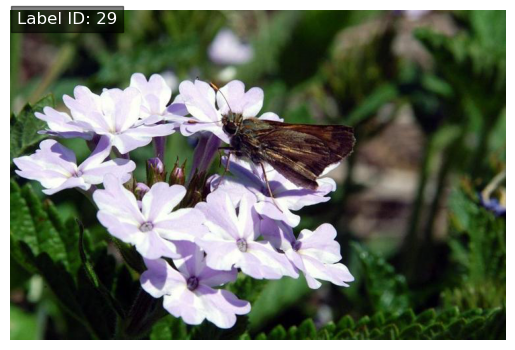

In [3]:
#Testing:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_dir = r"/home/duhao/004 Project4 ResNet Flower/code/train"
dataset = Flowerdata(img_dir,transform=None)
img, label_id = dataset[2]
# Display the image and image
plt.imshow(img)
plt.axis('off')  
plt.text(x=10, y=20, s=f'Label ID: {label_id}', color='white', fontsize=12, bbox=dict(facecolor='black', alpha=0.5))
plt.show()


(array([ 40.,  60.,  40.,  56.,  65.,  45.,  40.,  85.,  46.,  45.,  87.,
         87.,  49.,  48.,  49.,  41.,  85.,  82.,  49.,  56.,  40.,  59.,
         91.,  42.,  41.,  41.,  40.,  66.,  78.,  85.,  52.,  45.,  46.,
         40.,  43.,  75., 108.,  56.,  41.,  67., 127.,  59., 130.,  93.,
         40., 196.,  67.,  71.,  49.,  92., 258.,  85.,  93.,  61.,  71.,
        109.,  67., 114.,  67., 109.,  50.,  55.,  54.,  52., 102.,  61.,
         42.,  54.,  54.,  62.,  78.,  96., 194., 171., 120., 107., 251.,
        137.,  41., 105., 166., 112., 131.,  86.,  63.,  58.,  63., 154.,
        184.,  82.,  76.,  66.,  46., 162., 128.,  91.,  66.,  82.,  63.,
         49.,  58.,  48.]),
 array([  1.        ,   1.99019608,   2.98039216,   3.97058824,
          4.96078431,   5.95098039,   6.94117647,   7.93137255,
          8.92156863,   9.91176471,  10.90196078,  11.89215686,
         12.88235294,  13.87254902,  14.8627451 ,  15.85294118,
         16.84313725,  17.83333333,  18.82352941, 

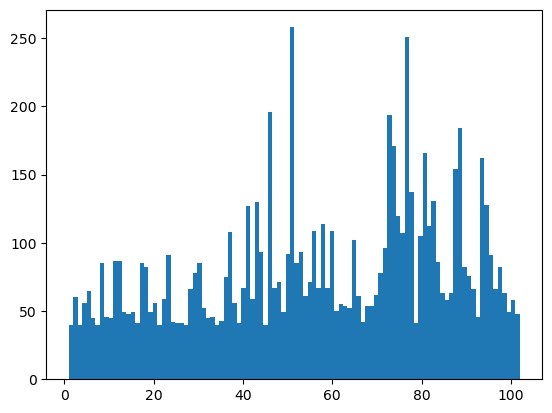

In [4]:
'''Farmiliar with the mat file'''
from scipy.io import loadmat
import os
import numpy as np
cur_work_dir=os.getcwd()
label_file=os.path.join(cur_work_dir,"imagelabels.mat")
assert os.path.exists(label_file)
data=loadmat(label_file)
a=data['labels'].tolist()[0]
import matplotlib.pyplot as plt
plt.hist(a,bins=len(set(a)))

In [5]:
#Splite the jpg data into train and valid dataset
import os
import random
import shutil

def copy_file(img_list,target_dir,setname):
    img_dir=os.path.join(target_dir,setname)
    os.makedirs(img_dir,exist_ok=True)
    for p in img_list:
        shutil.copy(p,img_dir)
    print(f"{setname} dataset: copy {len(img_list)} images to{img_dir}.")
#Get the img path list
img_dir=r"./jpg"
img_list=[os.path.join(img_dir,name) for name in os.listdir(img_dir)]
random.seed(10086)
random.shuffle(img_list)
#Split the dataset
train_rate=0.8
valid_rate=0.2
num_img=len(img_list)
num_train=int(num_img*0.8)
num_valid=num_img-num_train
train_list=img_list[0:num_train]
valid_list=img_list[num_train+1:-1]
#Create new dir
target_dir=os.path.abspath(os.path.dirname(img_dir))
copy_file(train_list,target_dir,"train")
copy_file(valid_list,target_dir,"valid")

train dataset: copy 6551 images to/home/duhao/004 Project4 ResNet Flower/code/train.
valid dataset: copy 1636 images to/home/duhao/004 Project4 ResNet Flower/code/valid.
